In [1]:
## Overview 

In [11]:
### Import Libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import decomposition
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import time
import sys
import glob
sys.path.insert(0,'../../../../../utils/')
from helper_functions_genus import *
#import helper_function custom library
from model_builder_genus import ModelBuilder
pd.options.mode.chained_assignment = None
%matplotlib inline 

In [12]:
### Import and Clean Data
#load spectra data
df_aug = pd.read_csv("../../../../../data/refCanopies0802_0630.txt")
df_sep = pd.read_csv("../../../../../data/refCanopies0917_0630.txt")
df_oct = pd.read_csv("../../../../../data/refCanopies1016_0630.txt")

#load tree data
df_tree = pd.read_csv("../../../../../data/Export_Output_2_0630_Genus.txt")

In [13]:
#clean data
#removes non-vegatation pixels, tRef.NDVI = (tRef.x800_67 - tRef.x679_92) ./ (tRef.x800_67 + tRef.x679_92)
#removes shaded or dark pixels as well, (pixel's reflectance@800_67 <=0.15)
df_aug = data_cleaning(df_tree,df_aug)
df_sep = data_cleaning(df_tree,df_sep)
df_oct = data_cleaning(df_tree,df_oct)

In [14]:
#evaluate the model
#create a confusion matrix
labels = ["Ash","Maple","Oak","Pine","Redbud","Spruce"]
nclasses = 6

#hold metrics
evals = []

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1032  1.085442 -0.152879  0.027958 -0.075921 -0.038673 -0.008437  0.034097   
1033 -0.118584 -0.095233  0.024711 -0.017933 -0.022466  0.000507  0.001983   
1034  0.320678 -0.165289  0.007905 -0.043325 -0.023317 -0.010924  0.021089   
1035  0.090808 -0.134599  0.052237 -0.039576 -0.023120 -0.001072  0.016289   
1036 -1.425835 -0.074556  0.034194 -0.029856 -0.015372 -0.001469 -0.007395   

           PC8       PC9      PC10  ...      PC22      PC23      PC24  \
1032  0.021671  0.016691 -0.010665  ...  0.002880 -0.000469  0.002698   
1033  0.020644  0.006365 -0.010139  ...  0.001723  0.001011  0.001415   
1034  0.007797  0.009510  0.009591  ...  0.001589  0.000816 -0.001674   
1035  0.012299  0.002460 -0.002077  ... -0.001884 -0.000254  0.000151   
1036 -0.008123  0.010430  0.000745  ...  0.000346 -0.000535 -0.000597   

          PC25      PC26      PC27      PC28      PC29      PC30  target  
1032 -0.001042  0

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


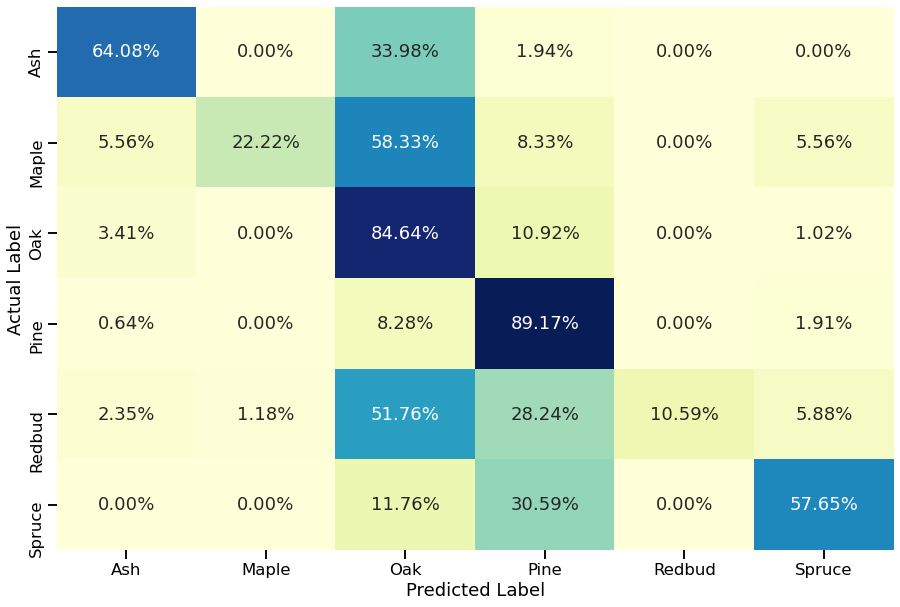

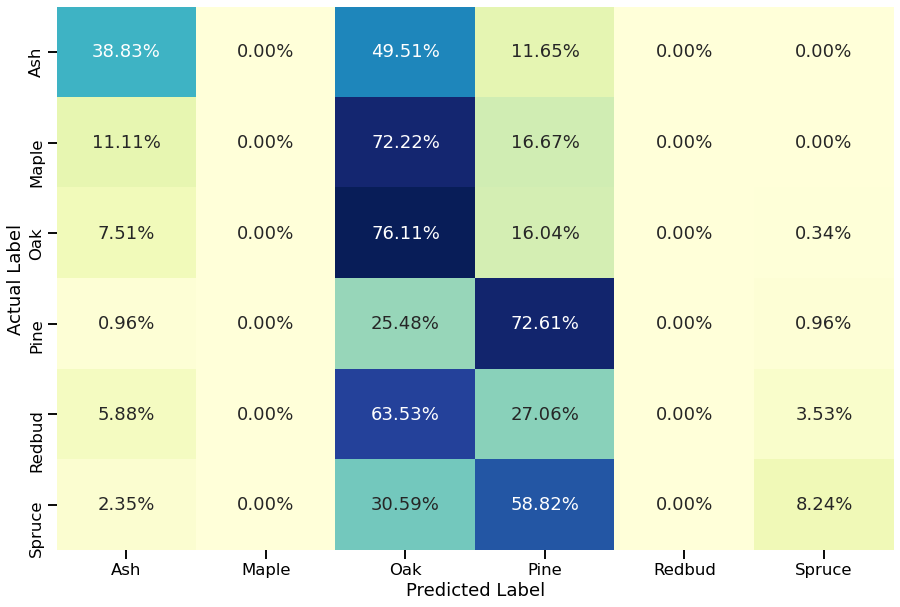

In [15]:
#prepare data for august
df_aug = df_aug.groupby(['ROIID','TARGET'], as_index = False).mean()
x_test = df_aug[df_aug.columns[3:]].values
y_test = LabelEncoder().fit_transform(df_aug.TARGET)

# #model for aug
model_name = 'canopy_hyper_ind_aug'
aug = joblib.load(glob.glob('../pixels/models/*aug.joblib')[0])
preds = aug.predict(x_test)
generate_cf(model_name,y_test,preds,nclasses, labels)

#metrics
test_accuracy = 100*(accuracy_score(y_test, preds))
aug_results =pd.DataFrame.from_dict( {"Model":[model_name], "Test Accuracy(%)":[test_accuracy]})
evals.append(aug_results)
# #model for aug_pc
model_name = 'canopy_hyper_ind_pc30_aug'
aug = joblib.load(glob.glob('../pixels/models/*pc30_aug.joblib')[0])
df_aug_pc = calculate_pcs(df_aug, x_test,30)
preds = aug.predict(df_aug_pc[df_aug_pc.columns[:-1]])
generate_cf(model_name,y_test,preds,nclasses, labels)

#metrics
test_accuracy = 100*(accuracy_score(y_test, preds))
pc30_aug_results =pd.DataFrame.from_dict( {"Model":[model_name], "Test Accuracy(%)":[test_accuracy]})
evals.append(pc30_aug_results)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1010  0.621663 -0.049972  0.013455  0.122660 -0.041309 -0.027897  0.030102   
1011 -1.171324 -0.058619  0.007464  0.017927 -0.015313 -0.007169  0.003458   
1012 -0.919839 -0.090653  0.047657  0.034540 -0.015364 -0.004004  0.008935   
1013 -1.319958 -0.062512 -0.017044  0.065685 -0.027919 -0.022490 -0.003402   
1014  0.052751  0.057734 -0.018118  0.048710  0.008468 -0.007387 -0.005456   

           PC8       PC9      PC10  ...      PC22      PC23      PC24  \
1010  0.004486 -0.011794 -0.001900  ... -0.001169 -0.003230 -0.002267   
1011 -0.005132  0.005034 -0.000415  ... -0.001004  0.000631 -0.001392   
1012  0.008633  0.002017 -0.002186  ... -0.002249 -0.000329 -0.000977   
1013 -0.011153  0.007562 -0.003209  ...  0.001409  0.000143  0.002369   
1014 -0.002610 -0.003230 -0.001019  ... -0.003434 -0.001268 -0.002123   

          PC25      PC26      PC27      PC28      PC29      PC30  target  
1010 -0.001077 -0

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


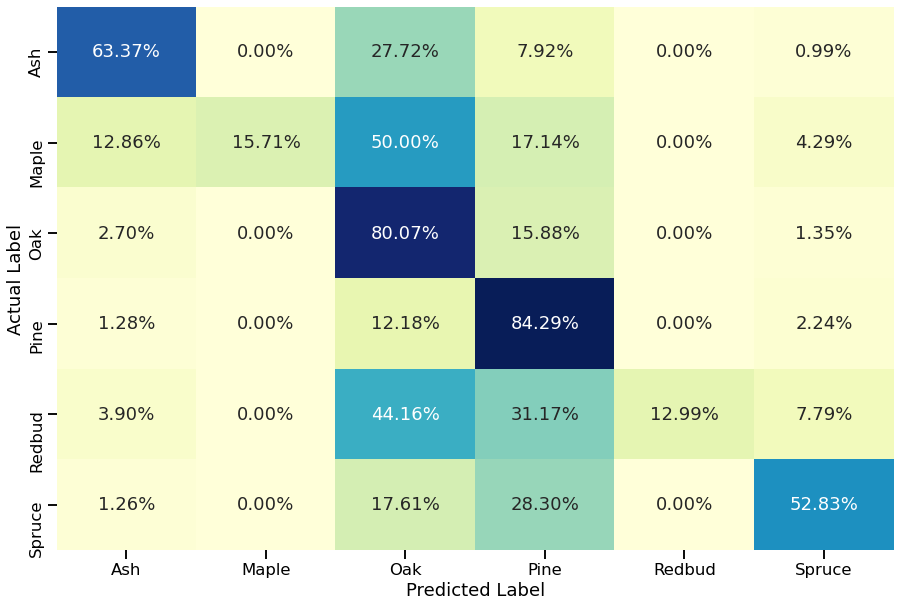

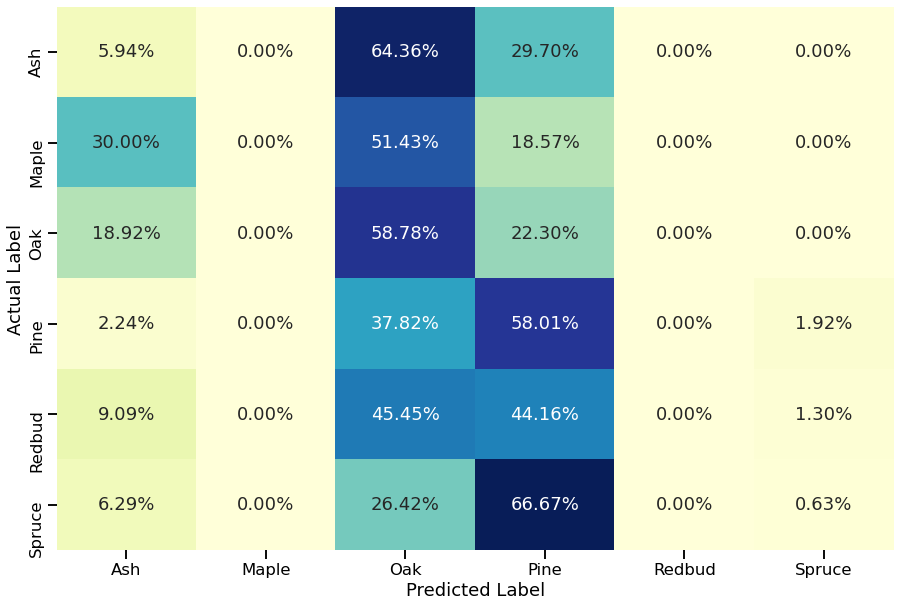

In [16]:
#prepare data for september e
df_sep = df_sep.groupby(['ROIID','TARGET'], as_index = False).mean()
x_test = df_sep[df_sep.columns[3:]].values
y_test = LabelEncoder().fit_transform(df_sep.TARGET)

# #model for aug
model_name = 'canopy_hyper_ind_sep'
sep = joblib.load(glob.glob('../pixels/models/*sep.joblib')[0])
preds = sep.predict(x_test)
generate_cf(model_name,y_test,preds,nclasses, labels)

#metrics
test_accuracy = 100*(accuracy_score(y_test, preds))
sep_results =pd.DataFrame.from_dict( {"Model":[model_name], "Test Accuracy(%)":[test_accuracy]})
evals.append(sep_results)

# #model for aug_pc
model_name = 'canopy_hyper_ind_pc30_sep'
sep = joblib.load(glob.glob('../pixels/models/*pc30_sep.joblib')[0])
df_sep_pc = calculate_pcs(df_sep, x_test,30)
preds = sep.predict(df_sep_pc[df_sep_pc.columns[:-1]])
generate_cf(model_name,y_test,preds,nclasses, labels)

#metrics
test_accuracy = 100*(accuracy_score(y_test, preds))
pc30_sep_results =pd.DataFrame.from_dict( {"Model":[model_name], "Test Accuracy(%)":[test_accuracy]})
evals.append(pc30_sep_results)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1019 -0.875918  0.056647 -0.055706  0.121849 -0.020540  0.012403 -0.032340   
1020 -0.625057 -0.087618 -0.047162  0.048485 -0.034202  0.002301 -0.020787   
1021  0.238728  0.022561 -0.089460  0.017733 -0.043897 -0.001558 -0.037312   
1022 -1.376023 -0.001621 -0.046936  0.060441 -0.030649 -0.007729 -0.000878   
1023 -1.411352 -0.053031  0.003008 -0.018422 -0.004299 -0.003615 -0.004109   

           PC8       PC9      PC10  ...      PC22      PC23      PC24  \
1019 -0.001472  0.001948  0.008832  ... -0.000902 -0.003309 -0.000458   
1020 -0.000964 -0.003487 -0.001429  ...  0.000584 -0.002690  0.001762   
1021 -0.006020  0.002240 -0.008809  ...  0.001668  0.003341  0.003667   
1022 -0.005307  0.006058  0.007648  ...  0.004069  0.004855  0.003541   
1023  0.002638 -0.005399  0.009640  ... -0.002515 -0.002333 -0.003487   

          PC25      PC26      PC27      PC28      PC29      PC30  target  
1019  0.001237  0

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.1s finished


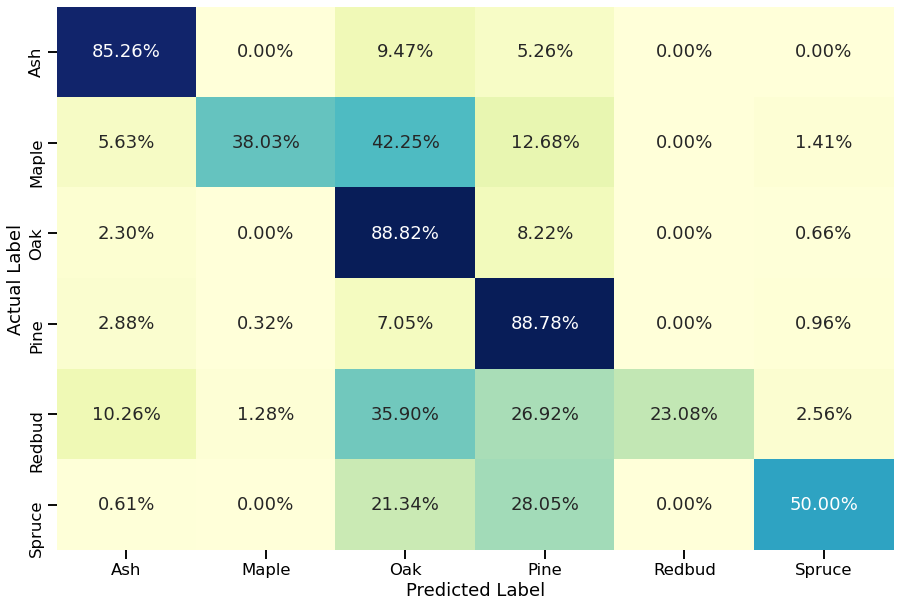

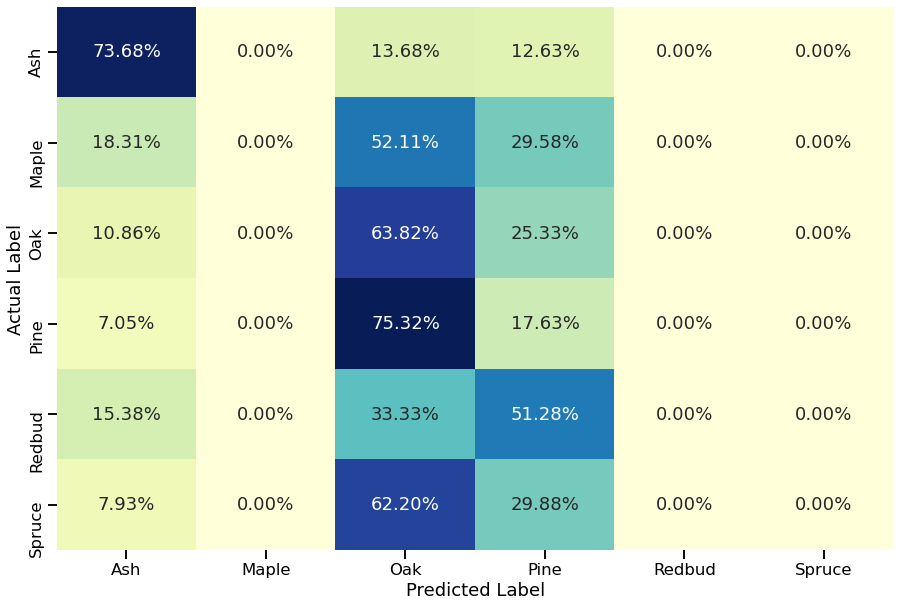

In [17]:
#prepare data for october
df_oct = df_oct.groupby(['ROIID','TARGET'], as_index = False).mean()
x_test = df_oct[df_oct.columns[3:]].values
y_test = LabelEncoder().fit_transform(df_oct.TARGET)

# #model for aug
model_name = 'canopy_hyper_ind_oct'
octb = joblib.load(glob.glob('../pixels/models/*oct.joblib')[0])
preds = octb.predict(x_test)
generate_cf(model_name,y_test,preds,nclasses, labels)
#metrics
test_accuracy = 100*(accuracy_score(y_test, preds))
oct_results =pd.DataFrame.from_dict( {"Model":[model_name], "Test Accuracy(%)":[test_accuracy]})
evals.append(oct_results)
# #model for aug_pc
model_name = 'canopy_hyper_ind_pc30_oct'
octb = joblib.load(glob.glob('../pixels/models/*pc30_oct.joblib')[0])
df_oct_pc = calculate_pcs(df_oct, x_test,30)
preds = octb.predict(df_oct_pc[df_oct_pc.columns[:-1]])
generate_cf(model_name,y_test,preds,nclasses, labels)

#metrics
test_accuracy = 100*(accuracy_score(y_test, preds))
pc30_oct_results =pd.DataFrame.from_dict( {"Model":[model_name], "Test Accuracy(%)":[test_accuracy]})
evals.append(pc30_oct_results)

In [18]:
df_results = pd.concat(evals)
df_results

,Model,Test Accuracy(%)
0,canopy_hyper_ind_aug,69.141755
0,canopy_hyper_ind_pc30_aug,48.698168
0,canopy_hyper_ind_sep,65.911330
0,canopy_hyper_ind_pc30_sep,35.665025
0,canopy_hyper_ind_oct,73.730469
0,canopy_hyper_ind_pc30_oct,31.152344


In [19]:
df_results.to_csv("canopy_hyper_ind_summary_results.csv")